### Importación de Tensorflow

In [0]:
%tensorflow_version 1.x

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importación de datos 

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("input/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting input/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting input/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting input/data/t10k-images-idx3-ubyte.gz
Extracting input/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### verificando los datos de prueba

In [4]:
mnist.train.images.shape

(55000, 784)

In [0]:
imagendemo=np.reshape(mnist.train.images[24,:],(28,28))

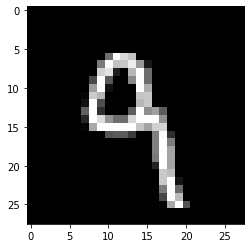

In [6]:
plt.imshow(imagendemo,cmap='gray')

In [0]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item*255))) for item in row]) 
      for row in img]))

In [8]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 108 254 215 196   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 121 252 194 199 238 152  24   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 209 226  31   0 182 254 109   0   0   0   0   0   0   0   0

### Declarando la arquitectura

Generando función 

In [0]:
def Neural_network_model(
    n_nodes_hl1=500,
    n_nodes_hl2=500,
    n_nodes_hl3=500,
    n_classes=10
    ):
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[None,784])
    y=tf.placeholder('float')
    
    # Declarando las variables 
    
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes]))}
    
    
    # Declarando la arquitectura
    
    l1 = tf.add(tf.matmul(x,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']
    
    # Declarando la funcion de costo y optimizador
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output
                                                                   , labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    return dict(
              x=x,
              y=y,
              output=output,
              cost=cost,
              optimizer=optimizer
              )

In [10]:
#Prueba del modelo
Neural_network_model()


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



{'cost': <tf.Tensor 'Mean:0' shape=() dtype=float32>,
 'optimizer': <tf.Operation 'Adam' type=NoOp>,
 'output': <tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>,
 'x': <tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>,
 'y': <tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>}

## función de entrenamiento  y prueba

In [0]:
def train_neural_network(DNN, hm_epochs=10,batch_size=100):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                feed_dict={DNN["x"]: epoch_x, 
                           DNN["y"]: epoch_y}
                _, c, prediction,y   = sess.run([DNN["optimizer"], DNN["cost"]
                                                 , DNN["output"], DNN["y"]], 
                                                feed_dict=feed_dict)
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
        
        ## prueba con el conjunto de entrenamiento 
        #Pr=[]
        #Lb=[]
        #for _ in range(int(mnist.train.num_examples/batch_size)):
        #        epoch_x, epoch_y = mnist.train.next_batch(batch_size)
        #        feed_dict={DNN["x"]: epoch_x, 
        #                   DNN["y"]: epoch_y}
        #        prediction,y   = sess.run([DNN["output"], DNN["y"]], 
        #                                        feed_dict=feed_dict)
        #        Pr.extend(prediction)
        #        Lb.extend(y)
        #correct = tf.equal(tf.argmax(Pr, 1), tf.argmax(Lb, 1))
        #accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        #print('Accuracy:',accuracy.eval())
        
        #Prueba con datos nunca antes vistos  
        prediction,y   = sess.run([DNN["output"], DNN["y"]], feed_dict={DNN["x"]:mnist.test.images, DNN["y"]:mnist.test.labels})
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval())

In [12]:
DNN=Neural_network_model()
train_neural_network(DNN)

Epoch 0 completed out of 10 loss: 1545989.88381958
Epoch 1 completed out of 10 loss: 374126.25086021423
Epoch 2 completed out of 10 loss: 207124.2115471363
Epoch 3 completed out of 10 loss: 120186.91193914413
Epoch 4 completed out of 10 loss: 77740.59080712497
Epoch 5 completed out of 10 loss: 48143.092775948
Epoch 6 completed out of 10 loss: 29862.736853541137
Epoch 7 completed out of 10 loss: 24229.885066136718
Epoch 8 completed out of 10 loss: 19167.435461814108
Epoch 9 completed out of 10 loss: 18146.111298441887
Accuracy: 0.9485
